In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# checking unique count for each feature
for x in df.columns[5:]:
    print("{}-----".format(x),df[x].unique())

Fuel_Type----- ['Petrol' 'Diesel' 'CNG']
Seller_Type----- ['Dealer' 'Individual']
Transmission----- ['Manual' 'Automatic']
Owner----- [0 1 3]


In [6]:
# checking missing values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#checking details of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner',]]

In [11]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
# creating a new feature No_Years
final_df['No_Year'] = 2020 - final_df['Year']
final_df.drop(['Year'],axis = 1 , inplace =True)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
final_df = pd.get_dummies(final_df,drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


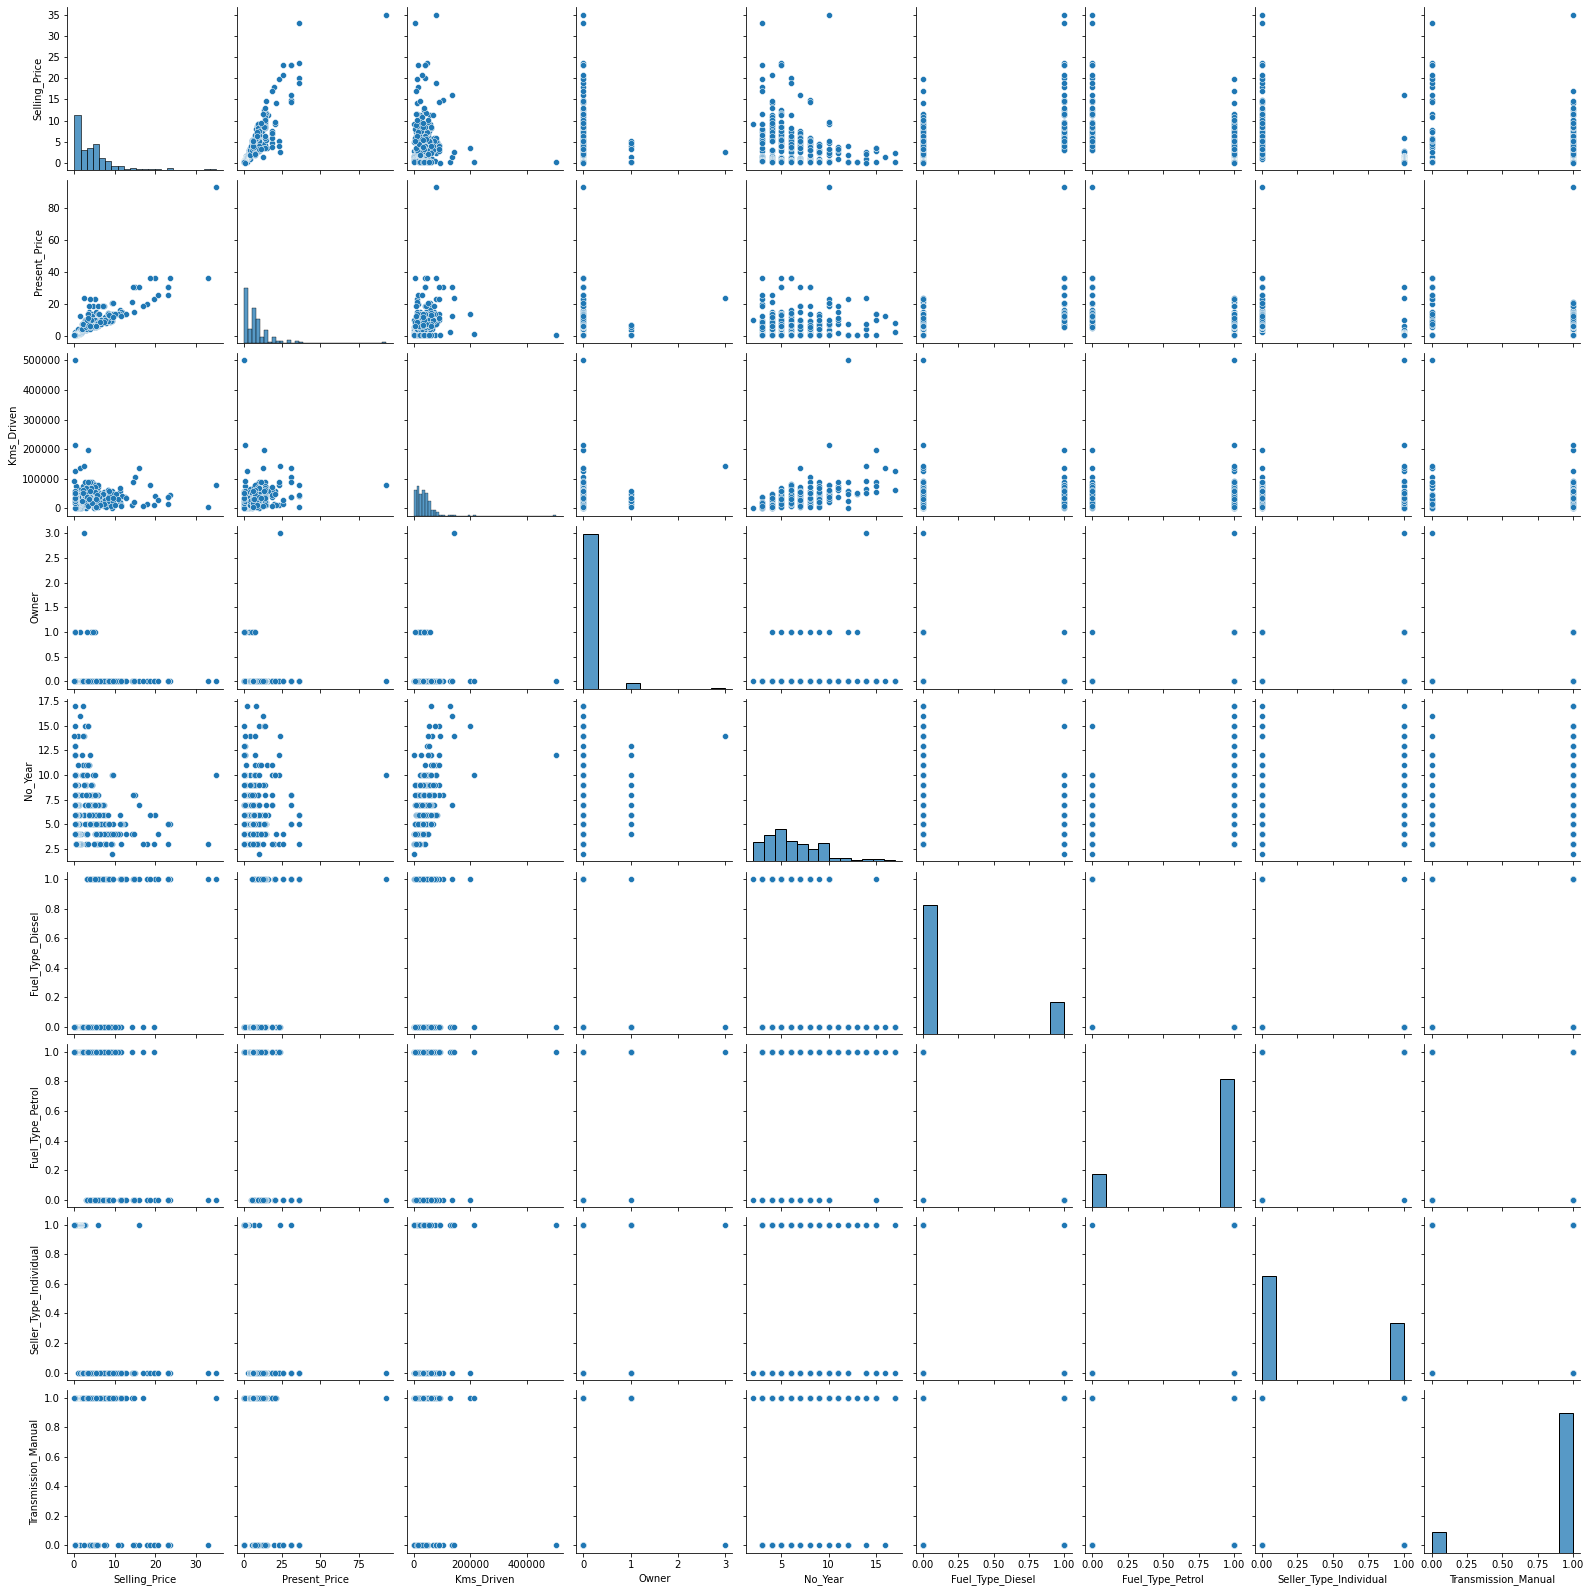

In [16]:
sns.pairplot(final_df)

<AxesSubplot:>

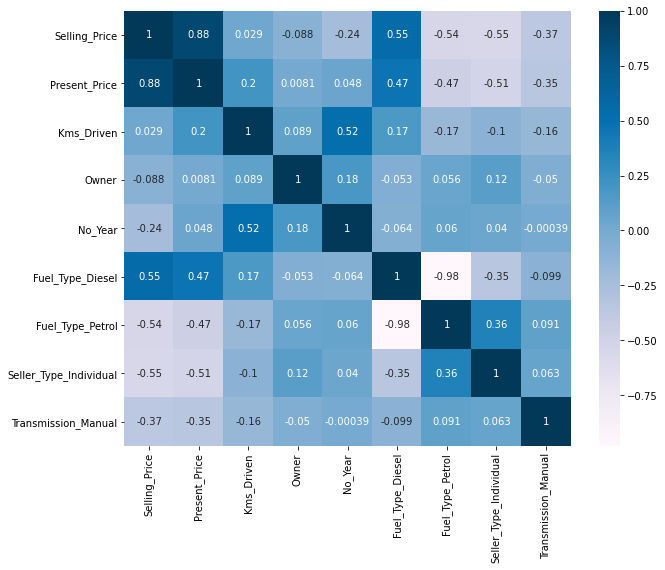

In [17]:

plt.figure(figsize = (10,8))
sns.heatmap(final_df.corr(),cmap='PuBu',annot=True)

In [18]:
# creating dependent & independent features
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [19]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [20]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [21]:
# create train test split
from sklearn.model_selection import train_test_split

# feature Importance
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[0.40297655 0.03896903 0.00123964 0.08128995 0.2086475  0.01443133
 0.13063784 0.12180815]


<AxesSubplot:>

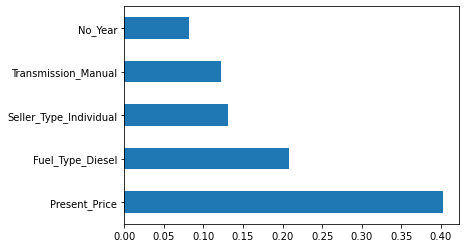

In [23]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind = 'barh')

In [24]:
# create train test split
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train,y_test = train_test_split(X,y , test_size = 0.2)

In [25]:
X_train.shape,X_test.shape ,y_train.shape,y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [26]:
# Regression Tree Classifier

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()


In [27]:
params = {
        'n_estimators':range(100,1200,12),
        'max_features':['auto','sqrt'],
        'min_samples_split':[2,5,10,15,100],
        'min_samples_leaf':[1,2,5,10],
        'max_depth':range(5,30,6)
}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
#gcv = GridSearchCV(rf,param_grid= params , n_jobs=-1, cv = 5 , verbose = 2  )
#gcv.fit(X_train,y_train)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [31]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': range(5, 30, 6),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': range(100, 1200, 12)},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 820,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 23}

In [33]:
predictions = rf_random.predict(X_test)
predictions

array([ 4.48045337,  5.21938723,  0.71711001,  5.34834179,  5.74941763,
        1.87260498, 21.35326805,  1.04623307,  4.92549985,  2.72600395,
        8.01753442,  0.53457182,  5.31355764,  5.69098782,  4.04482561,
        7.27368251,  8.05071158,  4.48758619,  5.67971236,  0.46567252,
        1.56271702,  0.85905395,  1.19874763,  7.92328251,  2.8012294 ,
       16.78688996,  4.52597733, 20.26209835,  0.31805063, 10.68801138,
        3.01918556,  0.6457976 ,  9.57580327, 10.41987083,  0.263591  ,
        3.9877065 ,  4.0420512 ,  7.56829541,  0.44099519, 12.99365741,
       10.43612415, 21.65835938,  2.77436553, 21.63283344,  7.48664323,
        0.4353341 , 10.41081962,  7.04426513,  2.82548339,  3.75880434,
       13.75427145,  0.43912075, 21.35326805,  3.11901078,  0.54196409,
        5.58705533,  0.22968194, 12.61876749,  0.4718175 ,  2.85499678,
        0.68703722])

c:\users\aditya\.conda\envs\car_prediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

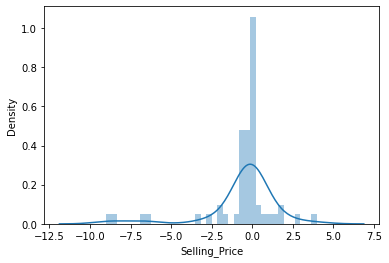

In [34]:
sns.distplot(y_test-predictions)# it should be mminimal

c:\users\aditya\.conda\envs\car_prediction\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Selling_Price'>

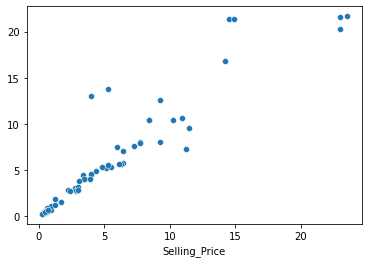

In [35]:
sns.scatterplot(y_test,predictions)

In [36]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,predictions))

1.1168697580153975


In [37]:
import pickle

file = open('rf_regression_model.pkl','wb')

pickle.dump(rf_random,file)